### IMPORTING MODULES

In [122]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets,metrics
from sklearn.ensemble import RandomForestClassifier
from scipy import misc
from numpy import empty


### Reading and storing an image from DATABASE and EXTERNAL

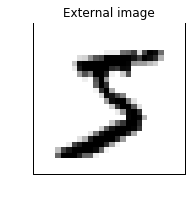

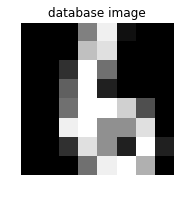

In [77]:
# the digits dataset 
digits=datasets.load_digits()
t=digits.target
#the image to predict_(testing)#the size,datatype and the values/pixels 
#are same as the trained set since the image is taken from the same set,
#othercase the attributes to be matched
im=digits.images[16]
ext_im=cv2.imread('5_five.png')

plt.subplot(1,2,1)
plt.axis('off')
plt.imshow(ext_im,cmap='gray',interpolation='nearest')
plt.title('External image')
plt.show()

plt.subplot(1,2,2)
plt.axis('off')
plt.imshow(im,interpolation='nearest')
plt.title('database image')
plt.show()

image from database and its shape and datatype


<Figure size 432x288 with 0 Axes>

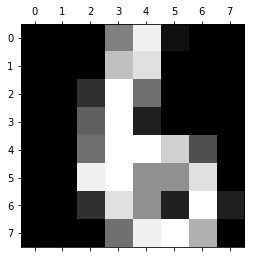

(8, 8)
float64
size after reshaping [[ 0.  0.  0.  8. 15.  1.  0.  0.  0.  0.  0. 12. 14.  0.  0.  0.  0.  0.
   3. 16.  7.  0.  0.  0.  0.  0.  6. 16.  2.  0.  0.  0.  0.  0.  7. 16.
  16. 13.  5.  0.  0.  0. 15. 16.  9.  9. 14.  0.  0.  0.  3. 14.  9.  2.
  16.  2.  0.  0.  0.  7. 15. 16. 11.  0.]]


In [45]:
print('image from database and its shape and datatype')
plt.gray()
plt.matshow(im)
plt.show()
print(im.shape)
print(im.dtype)
im2=im.reshape(1,64)
print('size after reshaping',im2)

External image and its shape and datatype
(960, 960, 3)
uint8
reshaped to  (8, 8, 3)
datatype converted to float64
scales pixels from 0 to 255 to 0 to 16 
 [[[16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]]

 [[16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [15 15 15]
  [14 14 14]
  [ 1  1  1]
  [16 16 16]]

 [[16 16 16]
  [16 16 16]
  [ 2  2  2]
  [ 0  0  0]
  [ 3  3  3]
  [16 16 16]
  [16 16 16]
  [16 16 16]]

 [[16 16 16]
  [16 16 16]
  [16 16 16]
  [ 3  3  3]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]]

 [[16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [ 3  3  3]
  [14 14 14]
  [16 16 16]
  [16 16 16]]

 [[16 16 16]
  [16 16 16]
  [16 16 16]
  [13 13 13]
  [ 0  0  0]
  [ 3  3  3]
  [16 16 16]
  [16 16 16]]

 [[16 16 16]
  [16 16 16]
  [ 2  2  2]
  [ 0  0  0]
  [15 15 15]
  [16 16 16]
  [16 16 16]
  [16 16 16]]

 [[16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16]
  [16 16 16

C:\Users\5TarkE-Angel\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: `bytescale` is deprecated!
`bytescale` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
  if __name__ == '__main__':


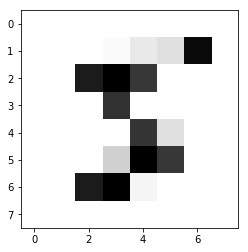

In [100]:
print('External image and its shape and datatype')
print(ext_im.shape)
print(ext_im.dtype)
ext_im2=cv2.resize(ext_im,(8,8))#resizesto 8*8
plt.imshow(ext_im2)
print('reshaped to ',ext_im2.shape)
ext_im3=np.asarray(ext_im2,dtype='float64')#converts the datatype
print('datatype converted to',ext_im3.dtype)
ext_im4=misc.bytescale(ext_im3,high=16,low=0)
print('scales pixels from 0 to 255 to 0 to 16 \n',ext_im4)
final=[]
for row in ext_im4:
    for pixel in row:
        final.append(sum(pixel)/3.0) 
final=np.array(final)
ext_im5=final.reshape(1,64)
print('1x64 matrix',ext_im5)


In [34]:
print(digits.images.shape)
n_samples=len(digits.images)
data=digits.images.reshape((n_samples,-1))#flattening the test image
print(data)
data.shape

(1797, 8, 8)
[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


(1797, 64)

### TRAINING OF THE ALGORITHM and prediction

In [29]:
#create a classifiee :a random forest classifier
classifier=RandomForestClassifier(n_estimators=30,criterion='entropy')
#we learn the digits on the first half of the digits
classifier.fit(data,digits.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [134]:
d_list=[]
d_list=[im2,ext_im5]#list to be predicted
i_list=[im,ext_im]# images under test

predicted value 
 [6]


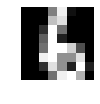

predicted value 
 [5]


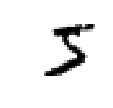

In [147]:
im_pd=list(zip(d_list,i_list))
for i,(val,img) in enumerate(im_pd[:2]):
    value=classifier.predict(val)
    print('predicted value \n',value)
    plt.subplot(2,4,i+1)
    plt.imshow(img,interpolation='nearest')
    plt.axis('off')
    plt.show()